In [125]:
import random
random.seed(42)
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Lit 🔥 Review Visualiser

# THE PAPER IS THE GRAPH

what does that mean? Welllll a Paper is an inherenetly recursive object in the real world, it has references which are papers which have references which are papers... 

So the object that we create to represent a Paper needs to represent this property, however we need to add a base case (a depth at which we no longer care about the references)

The real world has no recursion depth limits but python does

In [126]:
class Paper:

    def __init__(self, name = 0, distance = 0, references = []):
        """this constructor is recursive, eaech Paper create 
        a list of Papers that it references"""
        self.__name = name
        self.__distance = distance
        self.__relevance = 0
        self.__text = self.generate_abstract()
        self.__references = self.create_references() if references == [] else references

    def create_references(self):
        # return an empty list if we have exceeded relevant depth
        if self.get_distance() > 3:
            return []
        # otherwise, return a list of Paper objects, their distance set to this paper's distance + 1
        references = []

        for n in range(1, 6):
            paper = Paper(self.get_name() - n, self.get_distance() + 1)
            if self.is_relevent(paper):
                references.append(paper)

        return references
    
    def find_distance(self, name):
        queue = deque([(self, 0)])  # the queue will hold tuples of (paper, distance)
        while queue:
            paper, distance = queue.popleft()  # Dequeue a paper

            # if the target paper is this paper return the distance
            if name == paper.get_name():
                return distance
            
            # if the target paper is found in a paper's references, return the distance + 1
            elif name in [reference.get_name() for reference in paper.get_references()]:
                    print(f"Found {name} in {paper.get_name()}'s references")
                    return distance + 1
            else:
                # add all the paper's references to the queue with a distance of distance + 1
                for reference in paper.get_references():
                    queue.append((reference, distance + 1))

        # if the queue is empty and the paper hasn't been found, return infinity
        return float('inf')
    
    def count_references(self, name):
        count = 0
        queue = deque([self])  # the queue will hold papers
        while queue:
            paper = queue.popleft()  # Dequeue a paper

            # if the target paper is found in a paper's references, increment the count
            if name in [reference.get_name() for reference in paper.get_references()]:
                count += 1

            # add all the paper's references to the queue
            for reference in paper.get_references():
                queue.append(reference)

        return count

    
    def create_graph(self, graph=None):
        if graph is None:
            graph = nx.DiGraph()
        graph.add_node(self.get_name())
        for paper in self.get_references():
            graph.add_edge(self.get_name(), paper.get_name())
            paper.create_graph(graph)
        return graph

    def delete_references(self, name):
        queue = deque([self])  # the queue will hold papers
        while queue:
            paper = queue.popleft()  # Dequeue a paper

            # if the target paper is found in a paper's references, remove it
            paper.__references = [reference for reference in paper.get_references() if reference.get_name() != name]

            # add all the paper's references to the queue
            for reference in paper.get_references():
                queue.append(reference)

    def generate_abstract(self):
        """return random 15 words abstract"""
        
        corpus = """Lorem ipsum dolor sit amet, consectetur adipiscing elit. 
                    Curabitur efficitur in tortor sit amet efficitur. In hac habitasse 
                    platea dictumst. Praesent elementum condimentum porta. Maecenas id 
                    efficitur leo. Nulla sed ipsum rhoncus, bibendum est et, placerat 
                    sapien. Vestibulum laoreet eros ut turpis viverra, laoreet auctor 
                    nulla euismod. Integer facilisis est enim, faucibus congue magna 
                    imperdiet et. Nulla luctus cursus lacinia. Nunc faucibus consequat 
                    velit, eget cursus nisl cursus sagittis. Sed ut feugiat turpis. 
                    Nam id convallis sem. Vestibulum fringilla metus et laoreet 
                    ultrices. Suspendisse mattis quam sed diam pellentesque 
                    dapibus. Suspendisse ornare efficitur ultricies.
                """
        return " ".join(random.sample(corpus.split(), 15))
    
    def is_relevent(paper, self):
        """return True if the arg Paper
          is relevant to self"""
        paper_text = paper.get_abstract().split()
        self_text = self.get_abstract().split()
        common_words = set(paper_text) & set(self_text)
        paper.set_relevance(len(common_words))
        return len(common_words) >= 3

    def set_relevance(self, count):
        self.__relevance = count
    
    def get_relevance(self):
        return self.__relevance
    
    def get_abstract(self):
        return self.__text
    
    def get_name(self):
        return self.__name
    
    def get_distance(self):
        return self.__distance

    def get_references(self):
        return self.__references

    def __repr__(self):
        return f"{self.get_name()}: {self.get_references()}"

In [127]:
paper = Paper(2024)

In [128]:
paper.get_references()

[2023: [2022: [2017: [2016: [], 2015: [], 2013: [], 2012: []]], 2019: [2017: [2014: [], 2013: []], 2016: [2015: [], 2014: [], 2011: []], 2015: [2014: [], 2013: [], 2012: []], 2014: [2013: [], 2012: [], 2011: [], 2009: []]], 2018: [2016: [2011: []], 2015: [2014: [], 2012: [], 2010: []], 2014: [2012: [], 2010: []]]],
 2022: [2021: [2019: [2018: [], 2016: [], 2015: [], 2014: []], 2018: [2017: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: []], 2016: [2014: [], 2012: []]], 2020: [2019: [2015: []], 2018: [2017: [], 2016: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: [], 2012: []], 2016: [2015: [], 2013: [], 2011: []]], 2019: [2018: [2017: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: [], 2012: []], 2016: [2014: [], 2013: [], 2011: []], 2015: [2014: [], 2013: [], 2011: [], 2010: []], 2014: [2013: [], 2012: [], 2011: [], 2010: [], 2009: []]]],
 2021: [2019: [2018: [2017: [], 2013: []], 2017: [2016: [], 2015: [], 2014: 

In [129]:
paper.count_references(2020)

2

If one of the references is found not to be relevant

In [130]:
paper.delete_references(2020)

In [131]:
paper.count_references(2020)

0

## Finding distance from root paper to any given reference

`find_distance()` returns the shortest distance found from one Paper to another

In [132]:
paper.find_distance(2024)

0

Distance from the paper to itself is 0

In [133]:
paper.find_distance(2020)

inf

In [134]:
paper.find_distance(2022)

Found 2022 in 2024's references


1

The search is implemented breadth-first: you can see 2022 in 2023's references, but we check all the references of a given paper _before_ we check _its_ references

In [135]:
paper.get_references()

[2023: [2022: [2017: [2016: [], 2015: [], 2013: [], 2012: []]], 2019: [2017: [2014: [], 2013: []], 2016: [2015: [], 2014: [], 2011: []], 2015: [2014: [], 2013: [], 2012: []], 2014: [2013: [], 2012: [], 2011: [], 2009: []]], 2018: [2016: [2011: []], 2015: [2014: [], 2012: [], 2010: []], 2014: [2012: [], 2010: []]]],
 2022: [2021: [2019: [2018: [], 2016: [], 2015: [], 2014: []], 2018: [2017: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: []], 2016: [2014: [], 2012: []]], 2019: [2018: [2017: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: [], 2012: []], 2016: [2014: [], 2013: [], 2011: []], 2015: [2014: [], 2013: [], 2011: [], 2010: []], 2014: [2013: [], 2012: [], 2011: [], 2010: [], 2009: []]]],
 2021: [2019: [2018: [2017: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2012: []], 2016: [2015: [], 2013: [], 2012: []], 2014: [2011: [], 2009: []]], 2018: [2017: [2016: []], 2016: [2013: []], 2015: [2013: [], 2012: [], 2010: []

Attempting to find the distance to a paper that isn't referenced will return `inf`, in other words, not in the references

In [136]:
paper.find_distance(2025)

inf

In [137]:
paper.find_distance(1997)

inf

## Find the number of edges

In other words, in our graph, how many times is a given paper referenced? 

In [138]:
paper.count_references(2024)

0

The root of the graph will have no edges in our implementation, as we have hardcoded papers to only contain references to earlier years, but they may in an actual use case

In [139]:
paper.count_references(2010)

13

Papers from earlier years will naturally have more references

## Combining two graphs

In [140]:
paper_24 = Paper(2024)

In [141]:
paper_10 = Paper(2010)

In [142]:
new_root = Paper(2025, 0, [paper_24, paper_10])

In [143]:
new_root.get_references()

[2024: [2023: [2022: [2020: [2019: [], 2018: [], 2017: [], 2016: [], 2015: []], 2018: [2017: [], 2016: [], 2015: [], 2014: [], 2013: []], 2017: [2015: [], 2014: [], 2013: []]], 2021: [2019: [2018: [], 2017: [], 2015: [], 2014: []], 2018: [2014: [], 2013: []]], 2020: [2019: [2018: [], 2017: [], 2016: [], 2015: [], 2014: []], 2016: [2013: [], 2012: [], 2011: []], 2015: [2013: [], 2012: [], 2010: []]], 2018: [2016: [2015: [], 2013: [], 2011: []], 2015: [2014: [], 2013: [], 2012: [], 2011: [], 2010: []], 2014: [2012: []], 2013: [2012: [], 2010: [], 2008: []]]], 2022: [2019: [2017: [2016: [], 2014: [], 2012: []], 2015: [2012: [], 2011: [], 2010: []], 2014: [2013: [], 2012: [], 2011: [], 2010: []]], 2018: [2017: [2016: [], 2015: [], 2013: [], 2012: []], 2016: [2015: [], 2014: [], 2011: []], 2015: [2014: [], 2013: [], 2011: [], 2010: []], 2013: [2010: []]], 2017: [2016: [2015: [], 2014: [], 2011: []], 2014: [2010: []]]], 2019: [2015: [2014: [2013: [], 2011: [], 2010: [], 2009: []], 2013: [200

In [144]:
new_root.count_references(2024)

1

In [145]:
new_root.count_references(2010)

13

The `new_root` is now considered a paper, you can think about this as the placeholder for the paper you are planning to write in real life!

As such, the distance from that paper to 2024 and 2010 is now 1

In [146]:
G = new_root.create_graph()

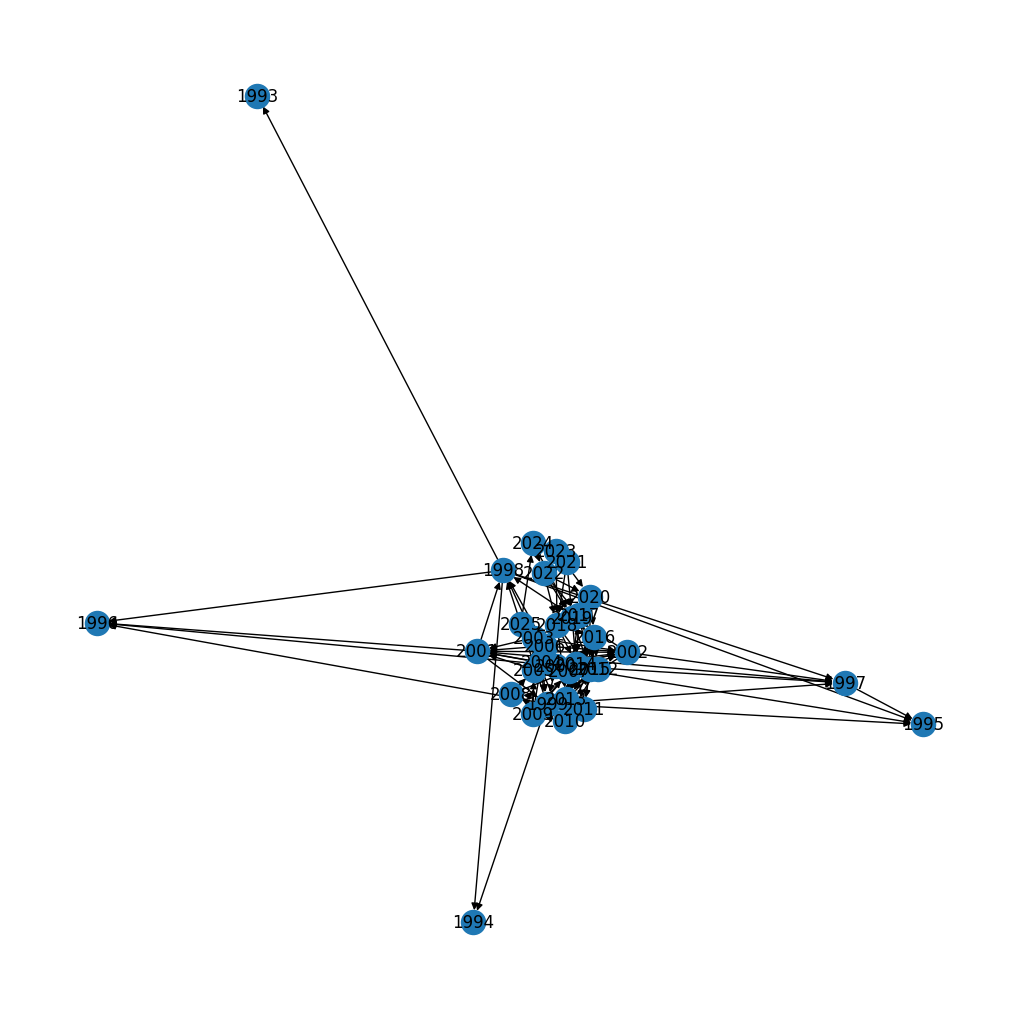

In [147]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True)
plt.show()